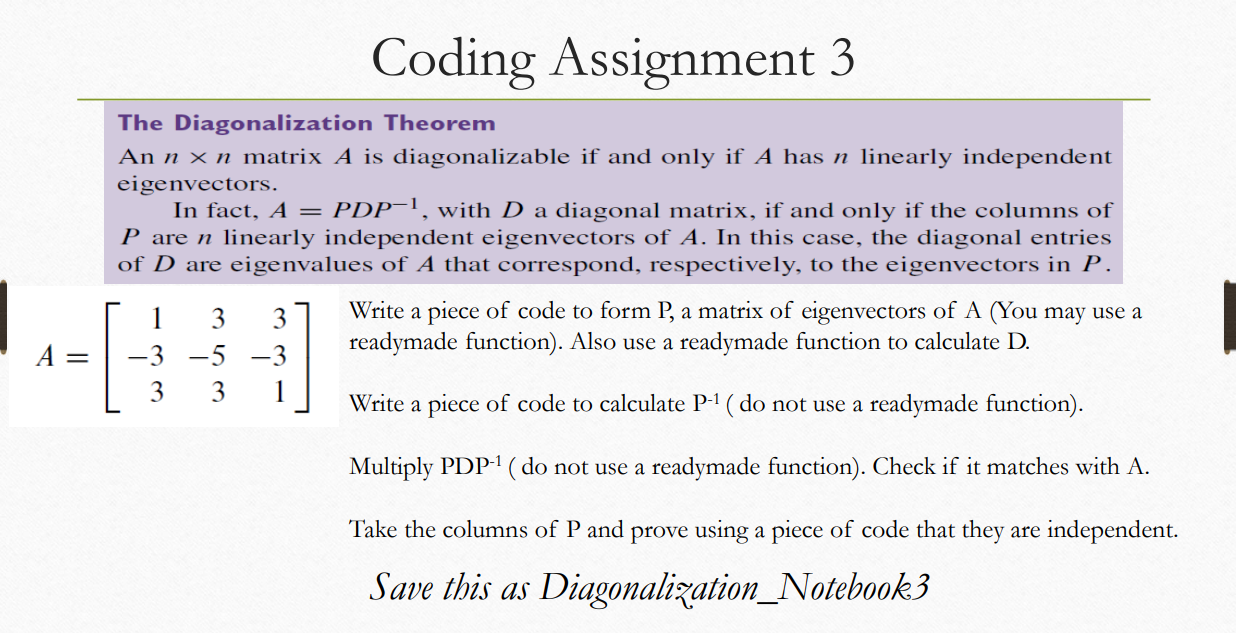

In [10]:
from IPython.display import Image
path=r"C:\Users\MUTHU SELVI\Pictures\Screenshots\Screenshot 2024-05-24 162314.png"
Image(path)

define the matrix

In [11]:
import numpy as np
A = np.array([[1, 3, 3],
              [-3, -5, -3],
              [3, 3, 1]])
A

array([[ 1,  3,  3],
       [-3, -5, -3],
       [ 3,  3,  1]])

Forms matrix P with eigenvectors of A and calculates D using a function.

In [12]:
def formPD(matrix):
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
    return eigen_vectors, np.diag(eigen_values)

P, D = formPD(A)
P = np.array(P)
D = np.array(D)
print("P = ", P)
print("D = ", D)

P =  [[-0.57735027 -0.78762616  0.42064462]
 [ 0.57735027  0.20744308 -0.81636981]
 [-0.57735027  0.58018308  0.3957252 ]]
D =  [[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]


Calculates the inverse of P without using a ready-made function.

In [13]:
def calculate_Pinv(matrix):
    n = len(matrix)
    augmented_matrix = np.hstack((matrix, np.identity(n)))
    for i in range(n):
        max_row = i
        for k in range(i+1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]]

        divisor = augmented_matrix[i][i]
        augmented_matrix[i] /= divisor

        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                augmented_matrix[k] -= factor * augmented_matrix[i]

    inverse_matrix = augmented_matrix[:, n:]
    return inverse_matrix

P_inv = calculate_Pinv(P)
print("Inverse of P:")
print(P_inv)

Inverse of P:
[[-1.73205081 -1.73205081 -1.73205081]
 [-0.75691664 -0.04484052  0.71207612]
 [-1.41727082 -2.46126427 -1.04399344]]


Multiplies PDP^-1 without using a ready-made function and checks if it matches A.

In [14]:
def matrix_multiply(A, B):
    n = len(A)
    result = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

PD = np.dot(P, D)
PDP_inv = np.dot(PD, P_inv)
print("PDP^-1 = ", PDP_inv)

# Check if PDP^-1 matches with A
tolerance = 1e-2
all_elements_equal = np.allclose(A, PDP_inv, atol=tolerance)
print("A and PDP^-1 are equal:", all_elements_equal)


PDP^-1 =  [[ 1.  3.  3.]
 [-3. -5. -3.]
 [ 3.  3.  1.]]
A and PDP^-1 are equal: True


Checks if the columns of P are linearly independent.

In [15]:
rank = np.linalg.matrix_rank(P)
num_columns = P.shape[1]
print("Rank of the matrix P:", rank)
print("Number of columns in P:", num_columns)
if rank == num_columns:
    print("The columns of P are linearly independent.")
else:
    print("The columns of P are not linearly independent.")

Rank of the matrix P: 3
Number of columns in P: 3
The columns of P are linearly independent.
